## **Image Convolution**

**Libraries**

In [40]:
from matplotlib import pyplot as plt
from scipy.signal import convolve2d
import matplotlib.image as mpimg
import numpy as np
import cv2

**Load image**

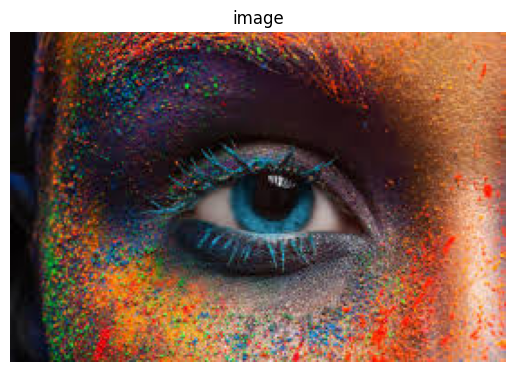

In [ ]:
image = plt.imread('/iamges/image.jpeg')
plt.imshow(image)
plt.title('image')
plt.axis('off')
plt.show()

**Mean filter**

In [17]:
image.shape

(183, 275, 3)

In [19]:
if image.ndim == 3:
    image_gray = np.dot(image[..., :3], [0.2989, 0.5870, 0.1140])

image_gray.shape

(183, 275)

In [20]:
G1 = np.ones((3, 3)) / 9
G1

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

In [22]:
G1.shape

(3, 3)

In [24]:
blurred_image = convolve2d(image_gray, G1, mode='same', boundary='symm')

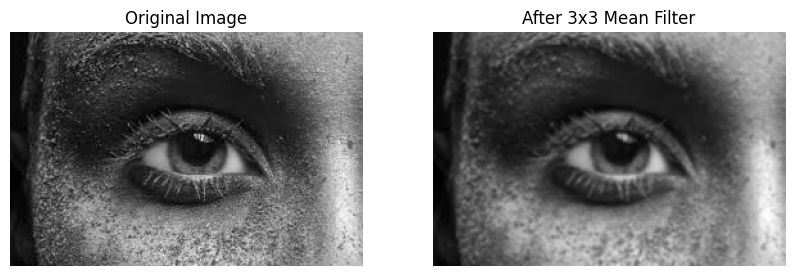

In [25]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image_gray, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(blurred_image, cmap='gray')
plt.title("After 3x3 Mean Filter")
plt.axis('off')

plt.show()

**G2 and G3 Kernels**

In [26]:
G2 = np.array([[0, 0, 0],
               [0, 2, 0],
               [0, 0, 0]]) 

In [28]:
G3 = G2 - G1
G3

array([[-0.11111111, -0.11111111, -0.11111111],
       [-0.11111111,  1.88888889, -0.11111111],
       [-0.11111111, -0.11111111, -0.11111111]])

In [29]:
image_g2 = convolve2d(image_gray, G2, mode='same', boundary='symm')
image_g3 = convolve2d(image_gray, G3, mode='same', boundary='symm')

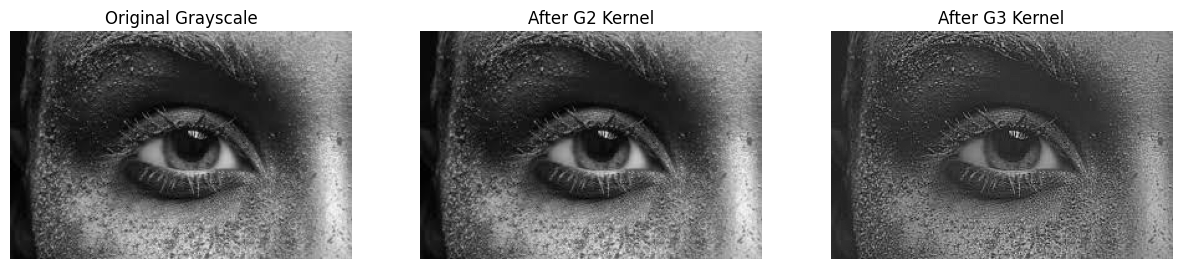

In [30]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(image_gray, cmap='gray')
plt.title("Original Grayscale")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(image_g2, cmap='gray')
plt.title("After G2 Kernel")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(image_g3, cmap='gray')
plt.title("After G3 Kernel")
plt.axis('off')

plt.show()

**G4 Kernel**

In [32]:
G4 = np.array([
    [-1, -1, 0],
    [-1,  3, 0],
    [ 0,  0, 0]
])

In [33]:
image_g4 = convolve2d(image_gray, G4, mode='same', boundary='symm')

In [34]:
image_g4_normalized = image_g4 + 0.5

In [35]:
image_g4_normalized = np.clip(image_g4_normalized, 0, 1)

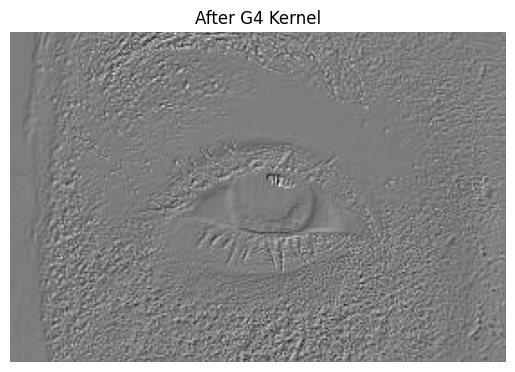

In [43]:
plt.imshow(image_g4, cmap='gray')
plt.title('After G4 Kernel')
plt.axis('off')
plt.show()

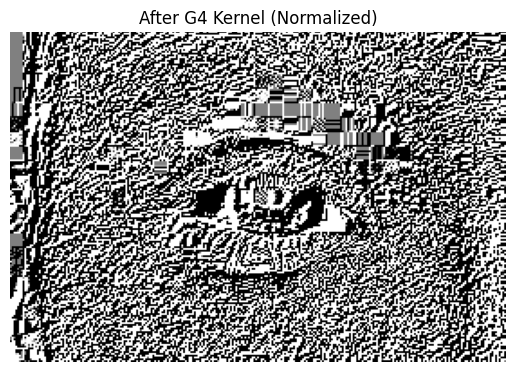

In [42]:
plt.imshow(image_g4_normalized, cmap='gray')
plt.title('After G4 Kernel (Normalized)')
plt.axis('off')
plt.show()

**Blur Twice**

In [45]:
blur_once = cv2.filter2D(image, -1, G1)
blur_twice = cv2.filter2D(blur_once, -1, G1)

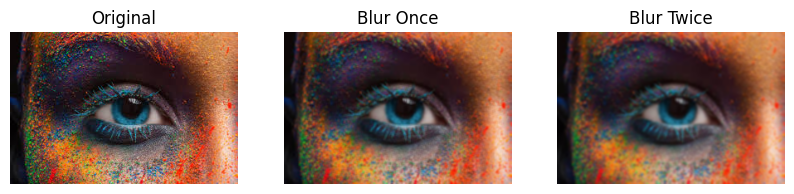

In [46]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(blur_once, cmap='gray')
plt.title('Blur Once')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(blur_twice, cmap='gray')
plt.title('Blur Twice')
plt.axis('off')

plt.show()

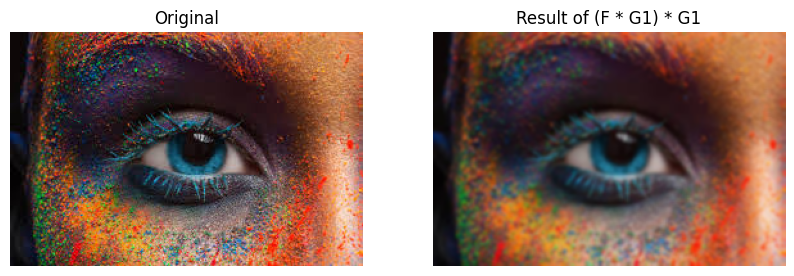

In [49]:
G_combined = convolve2d(G1, G1, mode='full')

blur_combined = cv2.filter2D(image, -1, G_combined)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(blur_combined, cmap='gray')
plt.title('Result of (F * G1) * G1')
plt.axis('off')

plt.show()

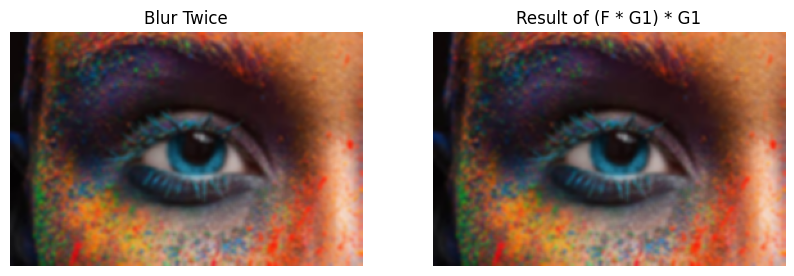

In [50]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(blur_twice, cmap='gray')
plt.title('Blur Twice')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(blur_combined, cmap='gray')
plt.title('Result of (F * G1) * G1')
plt.axis('off')

plt.show()

**Sobel Filter**

In [51]:
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])  

sobel_y = np.array([[-1, -2, -1],
                    [ 0,  0,  0],
                    [ 1,  2,  1]])

In [52]:
edges_x = cv2.filter2D(image, -1, sobel_x)
edges_y = cv2.filter2D(image, -1, sobel_y)

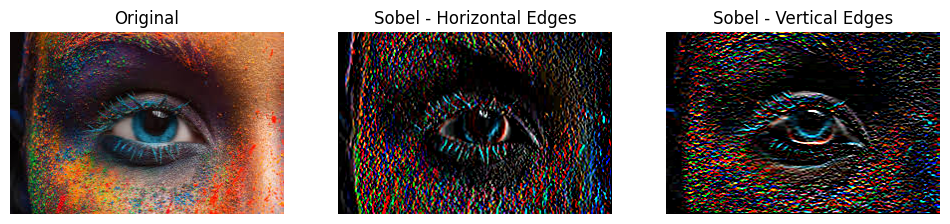

In [53]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(edges_x, cmap='gray')
plt.title('Sobel - Horizontal Edges')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(edges_y, cmap='gray')
plt.title('Sobel - Vertical Edges')
plt.axis('off')

plt.show()